# Explore structured prediction tasks and compare different prediction methods

**Authors: maria.boritchev@telecom-paris.fr and matthieu.labeau@telecom-paris.fr**

## Objectives:

- Explore Part-of-Speech (POS) tagging, in particular through tools integrated to the ```nltk``` library.

- Use the notion of _chunking_ and its different implementations and explore sentence structure.

- Implement a BIO tagging for POS and compare our implementation with tools integrated to the ```nltk``` library.

- Explore Named Entity Recognition (NER) with tools integrated to the ```nltk``` library and ```spaCy``` visualisations.

- Compare these tools with a neural network implementation using BERT. 

- Throughout this lab, we will use several datasets: ```nlp-getting-started```, ```entity-annotated-corpus```, and ```wikibooks-dataset```. These datasets need to be downloaded from the course page.

In [1]:
# The main packages needed for this lab:
import numpy as np
import pandas as pd
import nltk 
import os

In this lab, we will first use the functions ```word_tokenize``` and ```pos_tag``` for the POS tagging task. 

### Obtaining and exploring the data
We start from the beginning with the ```nlp-getting-started``` dataset. 

In [2]:
# Read data from nlp-getting-started:
nlp_start_df = pd.read_csv('nlp-getting-started/train.csv')

Explore the data directories and get familiar with their contents and type: how is the data organised? 

<span style="color:red">Questions:</span> What type of natural language data are we working with (sentences, words)? What are the sources and languages of the data?

**Awnser :**

We're working with sentences. It appears to be english messages provided by some social network as we can see a lot of "#" symbols before sentences.

In [3]:
# Examine example sentences:
nlp_start_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<span style="color:green">To code:</span> Using the functions ```word_tokenize``` and ```pos_tag``` of ```nltk```, tokenize an example sentence and apply POS tagging to it.

In [4]:
import nltk
from nltk import word_tokenize, pos_tag

nltk.download('averaged_perceptron_tagger')

# Tokenize a sentence and apply POS tagging:

# Example sentence:
sentence = nlp_start_df['text'][0]

# Tokenize the sentence:
tokens = word_tokenize(sentence)

# Apply POS tagging:
pos_tag(tokens)



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Our', 'PRP$'),
 ('Deeds', 'NNS'),
 ('are', 'VBP'),
 ('the', 'DT'),
 ('Reason', 'NNP'),
 ('of', 'IN'),
 ('this', 'DT'),
 ('#', '#'),
 ('earthquake', 'NN'),
 ('May', 'NNP'),
 ('ALLAH', 'NNP'),
 ('Forgive', 'NNP'),
 ('us', 'PRP'),
 ('all', 'DT')]

<span style="color:red">Question:</span> What is the set of POS-tags used by the ```pos_tag``` function?

**Awnser :**

The default set of POS tags used by the pos_tag function in NLTK is based on the Penn Treebank POS Tag Set.

As we discussed during the lecture, there can be different sets of POS-tags. The following shows you the documentation for the ```UPENN``` tagset.

In [5]:
nltk.download('tagsets')
nltk.download('universal_tagset')

nltk.help.upenn_tagset('NN')
nltk.help.upenn_tagset('IN')
nltk.help.upenn_tagset('DT')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


<span style="color:green">To code:</span>  Produce a different POS tagging of the same sentence using a different set of POS-tags of your choice.

In [6]:
# Tokenize the sentence and apply a different set of POS-tags of your choice:
tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens, tagset='universal')
print(pos_tags)

[('Our', 'PRON'), ('Deeds', 'NOUN'), ('are', 'VERB'), ('the', 'DET'), ('Reason', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('#', '.'), ('earthquake', 'NOUN'), ('May', 'NOUN'), ('ALLAH', 'NOUN'), ('Forgive', 'NOUN'), ('us', 'PRON'), ('all', 'DET')]


### Chunking
_Chunking_  is a process of grouping small pieces of information into large units. The primary use of chunking in the context of POS-tagging is in building sub-syntactic trees, using POS-tags-based grammars, implemented using _regular expressions_. The resulting subsentences are called _chunks_. For example, we can use chunking to subdivide a sentence in groups of _noun phrases_ (NPs). There are no pre-defined rules or grammars for chunking, these need to be implemented using regular expressions depending on our need. For example, if we want to chunk **only** ```NN``` tags, we need to use the pattern ````mychunk:{<NN>}````. Conversly, if we want to chunk **all types of tags** which start with 'NN', we'll use `mychunk:{<NN.*>}`.

<span style="color:green">To code:</span>  Apply the chunking method to a sentence from the ```nlp-getting-started``` dataset.

After Chunking:
 (S
  Our/PRP$
  Deeds/NNS
  are/VBP
  the/DT
  Reason/NNP
  of/IN
  this/DT
  #/#
  (mychunk earthquake/NN)
  May/NNP
  ALLAH/NNP
  Forgive/NNP
  us/PRP
  all/DT)


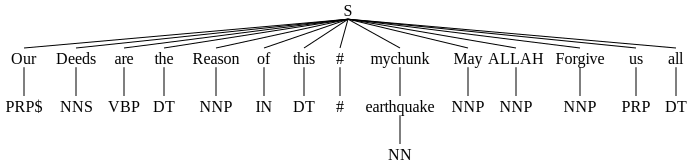

In [7]:
from nltk import RegexpParser
from nltk.draw.tree import TreeView
from IPython.display import Image
import svgling

patterns= """mychunk:{<NN>}"""
chunker = RegexpParser(patterns)

sentence = nlp_start_df['text'][0]
tokens = word_tokenize(sentence)
sentence = pos_tag(tokens)

output = chunker.parse(sentence)
print("After Chunking:\n",output)
svgling.draw_tree(output)


<span style="color:green">To code:</span>  Produce a chunking of the same sentence retrieving all the adjacence nouns (noun-based tags).

After Chunking:
 (S
  Our/PRP$
  (mychunk Deeds/NNS)
  are/VBP
  the/DT
  (mychunk Reason/NNP)
  of/IN
  this/DT
  #/#
  (mychunk earthquake/NN May/NNP ALLAH/NNP Forgive/NNP)
  us/PRP
  all/DT)


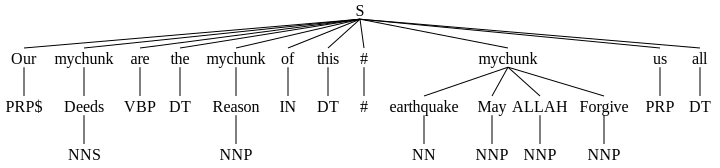

In [8]:
# Chunk all adjacence nouns from 'sentence' sentence
patterns= """mychunk:{<NN.*>+}"""
chunker = RegexpParser(patterns)

sentence = nlp_start_df['text'][0]
tokens = word_tokenize(sentence)
sentence = pos_tag(tokens)

output = chunker.parse(sentence)
print("After Chunking:\n",output)
svgling.draw_tree(output)

Chunking can also be done using BIO algorithm: ```B```eginning of a chunk, ```I```inside of a chunk, ```O```utside of a chunk.

In [9]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint # To display the list nicely

iob_tagged = tree2conlltags(output)
iob_tagged

[('Our', 'PRP$', 'O'),
 ('Deeds', 'NNS', 'B-mychunk'),
 ('are', 'VBP', 'O'),
 ('the', 'DT', 'O'),
 ('Reason', 'NNP', 'B-mychunk'),
 ('of', 'IN', 'O'),
 ('this', 'DT', 'O'),
 ('#', '#', 'O'),
 ('earthquake', 'NN', 'B-mychunk'),
 ('May', 'NNP', 'I-mychunk'),
 ('ALLAH', 'NNP', 'I-mychunk'),
 ('Forgive', 'NNP', 'I-mychunk'),
 ('us', 'PRP', 'O'),
 ('all', 'DT', 'O')]

<span style="color:green">To code:</span> Implement a tree-crawling retrieving the list of triples ```('word','POS-tag','BIO-tag')``` from ```chunker.parse``` output trees. 

In [10]:
def triples_from_tree(tree):
    triples = []

    for subtree in tree:
        if isinstance(subtree, nltk.Tree):  
            label = subtree.label()
            for i, (word, tag) in enumerate(subtree.leaves()):
                iob_tag = f"B-{label}" if i == 0 else f"I-{label}"
                triples.append((word, tag, iob_tag))
        else:
            word, tag = subtree
            triples.append((word, tag, 'O'))

    return triples

triples_from_tree(output)


[('Our', 'PRP$', 'O'),
 ('Deeds', 'NNS', 'B-mychunk'),
 ('are', 'VBP', 'O'),
 ('the', 'DT', 'O'),
 ('Reason', 'NNP', 'B-mychunk'),
 ('of', 'IN', 'O'),
 ('this', 'DT', 'O'),
 ('#', '#', 'O'),
 ('earthquake', 'NN', 'B-mychunk'),
 ('May', 'NNP', 'I-mychunk'),
 ('ALLAH', 'NNP', 'I-mychunk'),
 ('Forgive', 'NNP', 'I-mychunk'),
 ('us', 'PRP', 'O'),
 ('all', 'DT', 'O')]

# Named Entity Recognition (NER)

NER is also implemented in ```nltk```, using chunking: the ```ne_chunk()``` method in the ```nltk.chunk``` module. 

<span style="color:green">To code:</span>  Implement NER on the same sentence with the method showcased below.

In [11]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.chunk import ne_chunk

sentence = nlp_start_df['text'][0]

def extract_ne(trees, labels):

    ne_list = []
    for tree in ne_res:
        if hasattr(tree, 'label'):
            if tree.label() in labels:
                ne_list.append(tree)

    return ne_list

# NER on 'sentence' sentence

ne_res = ne_chunk(pos_tag(word_tokenize(sentence)))
labels = ['ORGANIZATION']

print(extract_ne(ne_res, labels))

[Tree('ORGANIZATION', [('Reason', 'NNP')])]


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


<span style="color:red">Questions:</span> What other labels are available?

**Awnser :**

- ORGANIZATION: Organizations, companies, institutions, etc.
- PERSON: People's names.
- LOCATION: Geographical locations such as cities, countries, etc.
- DATE: Dates.
- TIME: Times.
- MONEY: Monetary values.
- PERCENT: Percentage values.
- FACILITY: Buildings, airports, highways, bridges, etc.
- GPE: Geo-political entities such as countries.

<span style="color:green">To code:</span> Implement a NE extraction using two or more different labels. 

In [12]:
# NER using two or more different labels

sentence = nlp_start_df['text'][5]

def extract_ne(trees, labels):

    for label in labels:
        ne_list = []
        for tree in ne_res:
            if hasattr(tree, 'label'):
                if tree.label() in labels:
                    ne_list.append(tree)

    return ne_list

ne_res = ne_chunk(pos_tag(word_tokenize(sentence)))
labels = ['PERSON', 'GPE', 'LOCATION', 'FACILITY', 'GSP']

print(extract_ne(ne_res, labels))


[Tree('PERSON', [('Lake', 'NNP'), ('County', 'NNP')])]


## NER and ```spaCy```

```spaCy``` module also contains a statistical NER system. It is trained to identify named and numeric entities, such as companies, locations, organizations and products. First, we need more complex data. 

In [13]:
import sqlite3

cnx = sqlite3.connect('wikibooks-dataset/wikibooks.sqlite')
df_wikibooks = pd.read_sql_query("SELECT * FROM en", cnx)
df_wikibooks.head()

,title,url,abstract,body_text,body_html
0,Wikibooks: Radiation Oncology/NHL/CLL-SLL,https://en.wikibooks.org/wiki/Radiation_Oncolo...,Chronic Lymphocytic Leukemia and Small Lymphoc...,Front Page: Radiation Oncology | RTOG Trials |...,"<div class=""mw-parser-output""><table width=""10..."
1,Wikibooks: Romanian/Lesson 9,https://en.wikibooks.org/wiki/Romanian/Lesson_9,==Băuturi/Beverages==,Băuturi/Beverages[edit | edit source]\nTea : C...,"<div class=""mw-parser-output""><h2><span id=""B...."
2,Wikibooks: Karrigell,https://en.wikibooks.org/wiki/Karrigell,Karrigell is an open Source Python web framewo...,Karrigell is an open Source Python web framewo...,"<div class=""mw-parser-output""><p>Karrigell is ..."
3,Wikibooks: The Pyrogenesis Engine/0 A.D./GuiSe...,https://en.wikibooks.org/wiki/The_Pyrogenesis_...,====setupUnitPanel====,setupUnitPanel[edit | edit source]\nHelper fun...,"<div class=""mw-parser-output""><h4><span class=..."
4,Wikibooks: LMIs in Control/pages/Exterior Coni...,https://en.wikibooks.org/wiki/LMIs_in_Control/...,== The Concept ==,Contents\n\n1 The Concept\n2 The System\n3 The...,"<div class=""mw-parser-output""><div id=""toc"" cl..."


The following displays ```spaCy```'s NER on a given document from the ```wikibooks``` dataset.

In [14]:
import spacy
spacy.cli.download('en_core_web_sm')
nlp = spacy.load("en_core_web_sm")
wiki_ex = df_wikibooks.iloc[11]['body_text']
print(wiki_ex)
doc = nlp(wiki_ex)
doc 

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
This Wikibooks page is a fact sheet and analysis on the article "Habitual physical activity in children and adolescents with cystic fibrosis" about how exercise is related to the disease Cystic Fibrosis.

Contents

1 Background of this research
2 Where is the research from ?
3 What kind of research was this?
4 What did the research involve?

4.1 Pulmonary Function testing
4.2 Pros / Cons of this test


5 What were the basic results?
6 What conclusion can we take from this research ?
7 Practical Advice
8 Further information/ Resources

8.1 Cystic Fibrosis Australia
8.2 Cystic Fibrosis's National Ambassador Nathan Charles


9 References



Background of this research[edit | edit source]
The research was about the effects of taking part in exercise constantly or making it a habit in the population of children and teens that are severing from the genetic condition cystic Fibrosis.
What is  

This Wikibooks page is a fact sheet and analysis on the article "Habitual physical activity in children and adolescents with cystic fibrosis" about how exercise is related to the disease Cystic Fibrosis.

Contents

1 Background of this research
2 Where is the research from ?
3 What kind of research was this?
4 What did the research involve?

4.1 Pulmonary Function testing
4.2 Pros / Cons of this test


5 What were the basic results?
6 What conclusion can we take from this research ?
7 Practical Advice
8 Further information/ Resources

8.1 Cystic Fibrosis Australia
8.2 Cystic Fibrosis's National Ambassador Nathan Charles


9 References



Background of this research[edit | edit source]
The research was about the effects of taking part in exercise constantly or making it a habit in the population of children and teens that are severing from the genetic condition cystic Fibrosis.
What is  Cystic Fibrosis
It is a genetic condition, affecting lungs and digestion. Unfortunately, there is no 

In [15]:
print('All entity types that spacy recognised from the document above')
set([ent.label_ for ent in doc.ents])

All entity types that spacy recognised from the document above


{'CARDINAL',
 'DATE',
 'GPE',
 'NORP',
 'ORG',
 'PERCENT',
 'PERSON',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART'}

<span style="color:red">Questions:</span> What other labels are available?

**Awnser :**

Here are the other labels available that weren't recognize :

- FAC: Buildings, airports, highways, bridges, etc.
- LOC: Non-GPE locations, mountain ranges, bodies of water.
- PRODUCT: Objects, vehicles, foods, etc. (not services).
- EVENT: Named hurricanes, battles, wars, sports events, etc.
- LAW: Named documents made into laws.
- LANGUAGE: Any named language.
- MONEY: Monetary values, including unit.
- ORDINAL: "first", "second", etc.
- CARDINAL: Numerals that do not fall under another type.

<span style="color:green">To code:</span> Print out all persons and organizations recognised in the document.

In [16]:
# Print out all persons and organisations from the document above

for ent in doc.ents:
    if ent.label_ in ['PERSON', 'ORG']:
        print(ent.text, ent.label_)

Cystic Fibrosis ORG
Pulmonary Function PERSON
Pros / Cons ORG
7 Practical Advice ORG
Cystic Fibrosis's ORG
Nathan Charles PERSON
Cystic Fibrosis ORG
the American Children’s ORG
David Michael Orenstein PERSON
CF ORG
CF ORG
the CF community.[3] Two ORG
David Michael PERSON
Patricia PERSON
the Journal of Paediatric Pulmonology ORG
Questionnaire PERSON
Pulmonary Function PERSON
cycle ergometer PERSON
Godfrey PERSON
Pulmonary PERSON
CF ORG
pulmonary lung PERSON
Pros / Cons ORG
the Australian Cystic Fibrosis Council ORG
Cystic Fibrosis ORG
CF ORG
CF ORG
CF ORG
Cystic Fibrosis ORG
Cystic Fibrosis ORG
Cystic Fibrosis's ORG
Cystic Fibrosis's ORG
Nathan Charles PERSON
Nathan Charles PERSON
Playing Elite Rugby ORG
Kelsey S PERSON
Doershuk C. PERSON
Saskatoon Public Library ORG
↑ M. Orenstein PERSON
F. Kelsey S. Measuring Physical Activity PERSON
↑ Gulmans V PERSON
Brackel H ORG
Faber J PERSON
Berger R PERSON
Helders P. Outpatient ORG
NIXON P ORG
CF. ORG
↑ Charles N. NATIONAL PERSON
CYSTIC FIBROSI

```spaCy``` also features a very nice visualization tool for NE. The following showcases this tool on a Wikibooks page.

In [17]:
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)

<span style="color:red">Questions:</span> Can you see problems in this annotation? What adaptations would you suggest?

**Awnser :**

- There are evidently some categories that are not consistently well-recognized in certain cases. For instance, the "PERSON" category may encompass terms like "pulmonary" or "pulmonary lung," and "cycle ergometer." Persons can occasionally be misinterpreted as "ORG," which is not ideal. Moreover, we recognize that the frequent use of capital letters in this dataset, especially within words, tends to mislead the model into predicting organizations, as it assumes that only such words with capital letters are relevant.

- To address this, one approach is to introduce additional labels to better distinguish between different types of words. For example, introducing a new label for diseases could enhance the model's performance. Additionally, fine-tuning the model and adjusting capitalization to lowercase could lead to improved generalization.

### Comparing accuracies with a pre-trained model

We will now use a pre-trained BERT-based model from the ```transformers``` library. Assuming we use the model as is, and do not do any fine-tuning, we can use the high-level interface from the library, ```pipeline```.
First, let's look at the model and the tags it uses. 

In [18]:
from transformers import AutoModelForTokenClassification, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")
print('Entities from the pretrained model')
print(model.config.id2label)

c:\Users\nicol\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\nicol\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 

Entities from the pretrained model
{0: 'O', 1: 'B-MISC', 2: 'I-MISC', 3: 'B-PER', 4: 'I-PER', 5: 'B-ORG', 6: 'I-ORG', 7: 'B-LOC', 8: 'I-LOC'}


Now, let's look at one last dataset. It contains **reference tags** for every word in the sentences. However, the tagset is not exactly the same - we will need to use a mapping. For simplicity, we will only look at the *Location* tags in what follows ! 

In [19]:
# Let's re-format the dataset for convenience
df = pd.read_csv('./entity-annotated-corpus/ner_dataset.csv', encoding='unicode_escape')
df['Sentence #'] = df['Sentence #'].ffill()
# Grouping sentences together into one sentence by row, for words, pos, tags
df_gr = df.groupby('Sentence #').agg(lambda x: list(x))
# Just renaming indexes
df_gr.index  = [int(s[9:]) for s in df_gr.index]

In [20]:
# What's the tagset ? 
tags = []
for tag in df_gr['Tag'].to_list():
    tags.extend(tag)
print('Entities in our data set')
print(set(tags))

Entities in our data set
{'B-org', 'B-eve', 'B-gpe', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-geo', 'I-eve', 'O', 'B-art', 'B-tim', 'I-nat', 'I-geo', 'I-org', 'B-per', 'I-art'}


<span style="color:red">Questions:</span> What is the tagset used in the previous cell?

The tagset used in this cell is a set of named entity tags that are present in the 'Tag' column of the dataset. The unique tags in the dataset are as follows:

- 'B-org': Beginning of an organization entity
- 'B-eve': Beginning of an event entity
- 'B-gpe': Beginning of a geopolitical entity
- 'I-per': Inside (non-initial) part of a person entity
- 'I-gpe': Inside (non-initial) part of a geopolitical entity
- 'I-tim': Inside (non-initial) part of a time entity
- 'B-nat': Beginning of a natural entity
- 'B-geo': Beginning of a geographical entity
- 'I-eve': Inside (non-initial) part of an event entity
- 'O': Outside of any named entity (non-entity words)
- 'B-art': Beginning of an artifact entity
- 'B-tim': Beginning of a time entity
- 'I-nat': Inside (non-initial) part of a natural entity
- 'I-geo': Inside (non-initial) part of a geographical entity
- 'I-org': Inside (non-initial) part of an organization entity
- 'B-per': Beginning of a person entity
- 'I-art': Inside (non-initial) part of an artifact entity

This tagset represents different types of named entities and their positions within the sentences. Each tag provides information about the role of the corresponding word in the context of named entity recognition.

In [45]:
from transformers import pipeline

# Let's look at an example !
example = df_gr.loc[1]['Word']
example = ' '.join(example)
example_tag = df_gr.loc[1]['Tag']
NER_model = pipeline("ner",
                     model="dslim/bert-base-NER",
                     grouped_entities=False)
print("Output from the pipeline containing the BERT-based model:")
print(NER_model(example))
print("Reference tag list")
print(example_tag)

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
c:\Users\nicol\anaconda3\Lib\site-packages\transformers\pipelines\token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.NONE"` instead.
  warnings.warn(


Output from the pipeline containing the BERT-based model:
[{'entity': 'B-LOC', 'score': 0.9997676, 'index': 9, 'word': 'London', 'start': 48, 'end': 54}, {'entity': 'B-LOC', 'score': 0.99985313, 'index': 15, 'word': 'Iraq', 'start': 77, 'end': 81}, {'entity': 'B-MISC', 'score': 0.99975556, 'index': 21, 'word': 'British', 'start': 111, 'end': 118}]
Reference tag list
['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


<span style="color:green">To code:</span> Assuming the following mapping between the tags from the dataset and those output by the BERT model:
```python
entity_mapping = {
'O': 'O',
'B-per': 'B-PER',
'I-per': 'I-PER',
'B-org': 'B-ORG',
'I-org': 'I-ORG',
'B-geo': 'B-LOC',
'I-geo': 'I-LOC',
'B-art': 'B-MISC', 'B-eve': 'B-MISC', 'B-gpe': 'B-MISC', 'B-nat': 'B-MISC', 'B-tim': 'B-MISC',
'I-art': 'I-MISC', 'I-eve': 'I-MISC', 'I-gpe': 'I-MISC', 'I-nat': 'I-MISC', 'I-tim': 'I-MISC',
}
``` 

Assuming you can use the less precise tagset (from the BERT model),
Find a way to compute the accuracy of the BERT-based model on all **complete locations** on the dataset. Compare with the same value obtained for the NLTK model !

### BERT

In [81]:
# Define the entity mapping
entity_mapping = {
    'O': 'O',
    'B-per': 'B-PER',
    'I-per': 'I-PER',
    'B-org': 'B-ORG',
    'I-org': 'I-ORG',
    'B-geo': 'B-LOC',
    'I-geo': 'I-LOC',
    'B-art': 'B-MISC', 'B-eve': 'B-MISC', 'B-gpe': 'B-MISC', 'B-nat': 'B-MISC', 'B-tim': 'B-MISC',
    'I-art': 'I-MISC', 'I-eve': 'I-MISC', 'I-gpe': 'I-MISC', 'I-nat': 'I-MISC', 'I-tim': 'I-MISC',
}

# Function to convert the tags from the dataset to BERT model tags
def convert_tags(tags):
    return [entity_mapping[tag] for tag in tags]

# Apply the conversion to the entire dataset
df_gr['Converted_Tag'] = df_gr['Tag'].apply(convert_tags)

In [82]:
# Function to compute accuracy for a sentence
def compute_accuracy(sentence_idx):
    sentence = ' '.join(df_gr.loc[sentence_idx]['Word'])
    predicted_tags = NER_model(sentence)
    predicted_tags = [ent['entity'] for ent in predicted_tags]

    # Extract complete locations from the dataset
    true_tags = df_gr.loc[sentence_idx]['Converted_Tag']
    true_locations = [tag for tag in true_tags if tag.endswith('LOC')]

    # Compute accuracy
    correct_predictions = sum(tag in predicted_tags for tag in true_locations)
    total_locations = len(true_locations)
    accuracy = correct_predictions / total_locations if total_locations > 0 else 0

    return accuracy

In [80]:
# Set the number of sentences to process
num_sentences_to_process = len(df_gr)

accuracies_bert = []
for idx, sentence_idx in enumerate(df_gr.index[:num_sentences_to_process], start=1):
    accuracy = compute_accuracy(sentence_idx)
    accuracies_bert.append(accuracy)

    if idx % 1000 == 0:
        print(f'Processed {idx} sentences out of {num_sentences_to_process}')

# Print average accuracy for BERT model
average_accuracy_bert = sum(accuracies_bert) / len(accuracies_bert)
print(f'Average Accuracy for BERT Model: {average_accuracy_bert}')


Processed 1000 sentences out of 47959
Processed 2000 sentences out of 47959
Processed 3000 sentences out of 47959
Processed 4000 sentences out of 47959
Processed 5000 sentences out of 47959
Processed 6000 sentences out of 47959
Processed 7000 sentences out of 47959
Processed 8000 sentences out of 47959
Processed 9000 sentences out of 47959
Processed 10000 sentences out of 47959
Processed 11000 sentences out of 47959
Processed 12000 sentences out of 47959
Processed 13000 sentences out of 47959
Processed 14000 sentences out of 47959
Processed 15000 sentences out of 47959
Processed 16000 sentences out of 47959
Processed 17000 sentences out of 47959
Processed 18000 sentences out of 47959
Processed 19000 sentences out of 47959
Processed 20000 sentences out of 47959
Processed 21000 sentences out of 47959
Processed 22000 sentences out of 47959
Processed 23000 sentences out of 47959
Processed 24000 sentences out of 47959
Processed 25000 sentences out of 47959
Processed 26000 sentences out of 4

### NLTK

In [160]:
from nltk.tree import Tree

def extract_named_entities(text):
    
    # Tokenize and perform POS tagging
    tokenized_text = word_tokenize(text)
    pos_tags = pos_tag(tokenized_text)

    # Perform named entity chunking
    chunked_entities = ne_chunk(pos_tags)

    # Extract entities from the chunked result
    entities = []
    for subtree in chunked_entities:
        if isinstance(subtree, Tree):
            entity_text = " ".join([token for token, pos in subtree.leaves()])
            entity_type = subtree.label()
            entities.append((entity_text, entity_type))

    return entities


In [161]:
def compute_accuracy_nltk(df):
    real_locations = 0
    nltk_correct_predictions = 0

    # Check if the DataFrame is not empty
    if len(df) == 0:
        print("DataFrame is empty.")
        return 0, 0

    # Iterate over sentences in the DataFrame
    for i in range(len(df)):
        if i % 1000 == 0:
            print(f'Processed {i} sentences out of {len(df)}')

        try:
            # Get the sentence and real tags
            sentence = ' '.join(df.loc[i]['Word'])
            real_tags = df.loc[i]['Tag']
        except Exception as e:
            print(f"Error processing sentence number {i}: {e}")
            continue

        # Extract entities using NLTK
        nltk_entities = extract_named_entities(sentence)

        # Check predictions against actual 'B-geo' and 'I-geo' tags
        for word, tag in zip(sentence.split(), real_tags):
            if tag in {'I-geo', 'B-geo'}:
                real_locations += 1
            if any(word in entity and entity_type == 'GPE' for entity, entity_type in nltk_entities) and tag in {'I-geo', 'B-geo'}:
                nltk_correct_predictions += 1

    return nltk_correct_predictions, real_locations

In [162]:
# Call the function and compute accuracy
nltk_correct_predictions, total_geo_tags = compute_accuracy_nltk(df_gr)

# Compute accuracy
accuracy = nltk_correct_predictions / total_geo_tags if total_geo_tags != 0 else 0

# Print results
print("Accuracy of the NLTK model :", accuracy)


Processed 0 sentences out of 47959
Error processing sentence number 0: 0
Processed 1000 sentences out of 47959
Processed 2000 sentences out of 47959
Processed 3000 sentences out of 47959
Processed 4000 sentences out of 47959
Processed 5000 sentences out of 47959
Processed 6000 sentences out of 47959
Processed 7000 sentences out of 47959
Processed 8000 sentences out of 47959
Processed 9000 sentences out of 47959
Processed 10000 sentences out of 47959
Processed 11000 sentences out of 47959
Processed 12000 sentences out of 47959
Processed 13000 sentences out of 47959
Processed 14000 sentences out of 47959
Processed 15000 sentences out of 47959
Processed 16000 sentences out of 47959
Processed 17000 sentences out of 47959
Processed 18000 sentences out of 47959
Processed 19000 sentences out of 47959
Processed 20000 sentences out of 47959
Processed 21000 sentences out of 47959
Processed 22000 sentences out of 47959
Processed 23000 sentences out of 47959
Processed 24000 sentences out of 47959


**Interpretation :**

The difference in accuracy between BERT (0.47) and NLTK (0.72) for named entity recognition (NER) could be due to variations in model complexity, training data representation, and the nature of the NER task. BERT, a sophisticated deep learning model, may underperform if not fine-tuned adequately or if its training data lacks diversity. NLTK, being rule-based, might excel if the NER patterns align well with its rules and if the training data closely resembles the test set. Success could also hinge on effective data preprocessing, task specifics, and resource considerations, where BERT demands more computational resources than NLTK.